In [1]:
# Need a dataset, any torch dataset is fine
import torch

from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

train_dataset = datasets.MNIST(root = './data',download = True, transform = transform)
test_dataset = datasets.MNIST(root = './data', download = True, train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 4, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 4, shuffle = False)

ImportError: DLL load failed while importing _C: The specified module could not be found.

In [ ]:
print(len(train_dataset),len(test_dataset))
print(type(test_dataset))

60000 10000
<class 'torchvision.datasets.mnist.MNIST'>


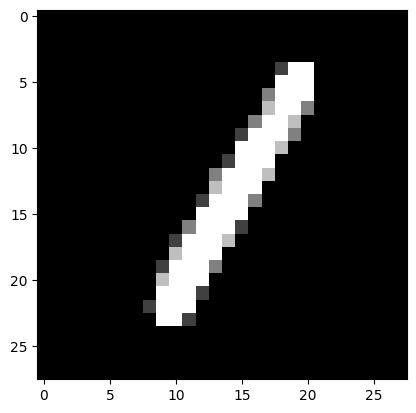

1


In [ ]:
# for inference phase
# a new data point comes

from random import randint
from matplotlib import pyplot as plt
idx = randint(0,len(test_dataset)-1)
image, label = test_dataset[idx]
plt.imshow(image.squeeze(), cmap='gray')	# squeeze() makes a tensor to a matrix
plt.show()

# define a data structure (length k) that contains sorted tuple (distance,label), sorted by distance
# once finished traversing the entire dataset
min_distance = 1e5
min_index = len(train_dataset) + 1
for i in range(len(train_dataset)):
    dist = torch.norm(image-train_dataset[i][0])
    if min_distance > dist:
        min_index = i
        min_distance = dist

predicted_label = train_dataset[min_index][1]
print(predicted_label)

# perform a majority voting

In [ ]:
# k-nn with k > 1 with sorted list
# define a data structure (length k) that contains sorted tuple (distance,label), sorted by distance
# once finished traversing the entire dataset
import time

time_start = time.perf_counter()
k = 100
sort_needed = False
top_k = []
min_distance = 1e5
min_index = len(train_dataset) + 1
for i in range(len(train_dataset)):
    dist = torch.norm(image-train_dataset[i][0])
    if i < k:
        top_k.append((dist,train_dataset[i][1]))
    if i == k-1 or sort_needed == True:
        top_k.sort()
    if i >= k and top_k[k-1][0] > dist:
        top_k[k-1] = (dist,train_dataset[i][1])
        sort_needed = True

label_count = {}# (label, count)
for i in range(k):
    if top_k[i][1] in label_count:
        label_count[top_k[i][1]] += 1
    else:
        label_count[top_k[i][1]] = 1

print(label_count)
max_count = 0
max_label = 10
for label in label_count:
    if label_count[label]>max_count:
        max_label = label
        max_count = label_count[label]

time_end = time.perf_counter()
print(f"The time took is {time_end-time_start: .2f} second(s).")
predicted_label = max_label
print(predicted_label)

# perform a majority voting

{1: 10}
The time took is  3.41 second(s).
1


In [ ]:
# k-nn with binary heap 
import heapq

time_start = time.perf_counter()
top_k = []

for i in range(len(train_dataset)):
    dist = torch.norm(image-train_dataset[i][0])
    if i < k:
        heapq.heappush(top_k,(-dist,train_dataset[i][1]))
    if i >= k and abs(top_k[0][0]) > dist:
        heapq.heappop(top_k)
        heapq.heappush(top_k,(-dist, train_dataset[i][1]))
        
label_count = {}# (label, count)
for i in range(k):
    if top_k[i][1] in label_count:
        label_count[top_k[i][1]] += 1
    else:
        label_count[top_k[i][1]] = 1

print(label_count)
max_count = 0
max_label = 10
for label in label_count:
    if label_count[label]>max_count:
        max_label = label
        max_count = label_count[label]

time_end = time.perf_counter()
print(f"The time took is {time_end-time_start: .2f} second(s).")

predicted_label = max_label
print(predicted_label)


{1: 10}
The time took is  2.42 second(s).
1
